# Small Project 1: Mapping protein-ligand interactions

In [1]:
import nglview

## Load a protein structure from local directory
view = nglview.show_file('./PDBDir/1VJC.pdb')

view

NGLWidget()

In [3]:
from Bio.PDB.PDBParser import PDBParser
import pandas as pd
import os


## Extract small ligand in the protein structure
    
def GetLigand(PDBDir, PDBCode, Ligand, chain):
    p = PDBParser(PERMISSIVE=1)
    PDBFilePath = os.path.join(PDBDir, PDBCode)
    s = p.get_structure(PDBCode, PDBFilePath)
    chain = s[0][chain]
    for residue in chain.get_residues():
        residue_id = residue.get_id()
        #print residue_id
        if residue_id[0] == "H_" + Ligand:
            return residue

PDBCode = '1VJC.pdb'
Ligand = 'ATP'; Chain = 'A'
PDBDir = os.path.join(os.getcwd(),'PDBDir')

ligand = GetLigand(PDBDir, PDBCode, Ligand, Chain)

print(ligand)

<Residue ATP het=H_ATP resseq=417 icode= >


In [4]:
## Get atoms that interact with specific ligand

def GetFunctionAtomsSet(PDBDir,PDBCode, Ligand, chain):
    FAS = []
    ligand = GetLigand(PDBDir,PDBCode, Ligand, chain)  # the ligand maybe None
    
    try:
        atoms1 = ligand.get_parent().get_atoms()
        atom_list = ["C", "N", "O", "CA", "CB"]
        
        for atom1 in atoms1: #遍历蛋白质上所有的原子
            if atom1.get_full_id()[3][0] == ' ' and atom1.get_name() not in atom_list: #No water, no main chain
                for atom2 in ligand: #计算与小分子上每一个原子的距离
                    if 0 < atom1-atom2 < 5.0: # 与小分子的任意原子距离小于5A 
                        FAS.append(atom1)
                        break
    except AttributeError as e:
        print(e)
    return FAS

FAS = GetFunctionAtomsSet(PDBDir,PDBCode, Ligand, Chain)

for atom in FAS: 
    print(atom.get_parent().get_resname()+str(atom.get_parent().get_id()[1]),atom.get_name())

LYS215 CG
ASP218 OD1
LYS219 CE
LYS219 NZ
PHE241 CD1
PHE241 CE1
PHE241 CZ
LEU256 CG
LEU256 CD1
PHE291 CD2
PHE291 CE2
PHE291 CZ
LEU313 CD2
PRO338 CG
PRO338 CD
VAL341 CG1
VAL341 CG2
PHE342 CD2
PHE342 CE2
GLU343 CG
GLU343 CD
GLU343 OE1
GLU343 OE2
ASP374 CG
ASP374 OD1
ASP374 OD2


In [6]:
## Get distance matrix between protein and ligand

def GetDistanceMatrix(PDBDir, PDBCode, Ligand, Chain):
    ligand = GetLigand(PDBDir,PDBCode, Ligand, Chain)
    FAS = sorted(GetFunctionAtomsSet(PDBDir,PDBCode, Ligand, Chain))
    
    pro_atom_ls = [i.get_parent().get_resname()+str(i.get_parent().get_id()[1])+'_'+i.get_name() for i in FAS]
    lig_atom_ls = [i.get_parent().get_resname()+'_'+i.get_name() for i in ligand.get_list()]
    dis_all = []
    
    for atom1 in FAS:
        dis_ls = []
        for atom2 in ligand.get_list():
            dis = atom1 - atom2
            dis_ls.append(dis)
        dis_all.append(dis_ls)
    
    df = pd.DataFrame(dis_all,index=pro_atom_ls,columns=lig_atom_ls)
    return df

df_dis = GetDistanceMatrix(PDBDir, PDBCode, Ligand, Chain)

In [7]:
df_dis

,ATP_PG,ATP_O1G,ATP_O2G,ATP_O3G,ATP_PB,ATP_O1B,ATP_O2B,ATP_O3B,ATP_PA,ATP_O1A,...,ATP_N9,ATP_C8,ATP_N7,ATP_C5,ATP_C6,ATP_N6,ATP_N1,ATP_C2,ATP_N3,ATP_C4
LYS215_CG,6.993522,5.840830,8.263272,6.895588,7.000070,6.135231,8.237174,7.516653,5.643070,4.217344,...,9.003701,9.621887,10.141714,9.859608,10.391010,11.244645,10.231900,9.562978,8.987594,9.165729
ASP218_OD1,7.464276,6.238811,8.598726,8.000921,6.285928,4.977515,7.100475,7.276445,6.015867,4.793441,...,11.564881,11.955289,12.661391,12.741458,13.530831,14.318951,13.629088,12.995575,12.205578,12.096681
LYS219_CE,8.262730,7.641495,9.670512,8.159853,6.343441,5.822739,6.774015,7.731292,4.404965,3.708940,...,9.102595,9.037860,9.639262,10.085214,10.993326,11.545069,11.485640,11.161281,10.355352,9.790799
LYS219_NZ,7.502542,6.815890,8.952139,7.279644,6.044308,5.511977,6.755473,7.238672,3.841323,2.825980,...,8.181809,8.283412,8.876115,9.150406,9.997906,10.638700,10.363510,9.965556,9.189401,8.760068
PHE241_CD1,15.668568,15.505338,16.901175,14.451015,15.751914,15.891450,16.569324,16.174917,12.881535,12.583089,...,8.467315,8.158702,7.025573,6.466228,5.349192,4.494356,5.513439,6.661553,7.627076,7.450035
PHE241_CE1,15.915242,15.880736,17.110598,14.628309,16.000881,16.262917,16.750757,16.385971,13.138144,12.991134,...,8.183191,7.775471,6.553663,6.056691,4.887835,3.812246,5.200454,6.477008,7.449137,7.170751
PHE241_CZ,17.255522,17.250988,18.438042,15.950345,17.320833,17.610735,18.035915,17.709673,14.448254,14.337935,...,9.338919,8.858745,7.596392,7.175383,5.999348,4.827951,6.326521,7.635134,8.638843,8.341183
LEU256_CD1,9.737409,9.460450,10.814980,8.621333,10.665848,10.687958,11.817596,10.663910,8.446071,7.925000,...,5.614844,6.448630,6.331511,5.244330,4.975377,5.885767,4.177341,3.601795,3.906068,4.720974
LEU256_CG,11.096869,10.805034,12.106734,9.987072,12.151203,12.151458,13.319158,12.094163,9.969345,9.425677,...,6.709157,7.491051,7.184079,5.975783,5.358309,6.096632,4.338356,3.980022,4.696887,5.625511
PHE291_CD2,12.321618,12.820681,12.763565,10.950636,13.985540,14.611619,14.880278,13.361024,12.482029,12.691635,...,7.213394,8.174374,8.093898,6.927401,6.536407,7.422827,5.511937,4.839502,5.247552,6.303619


<Figure size 2400x1800 with 0 Axes>

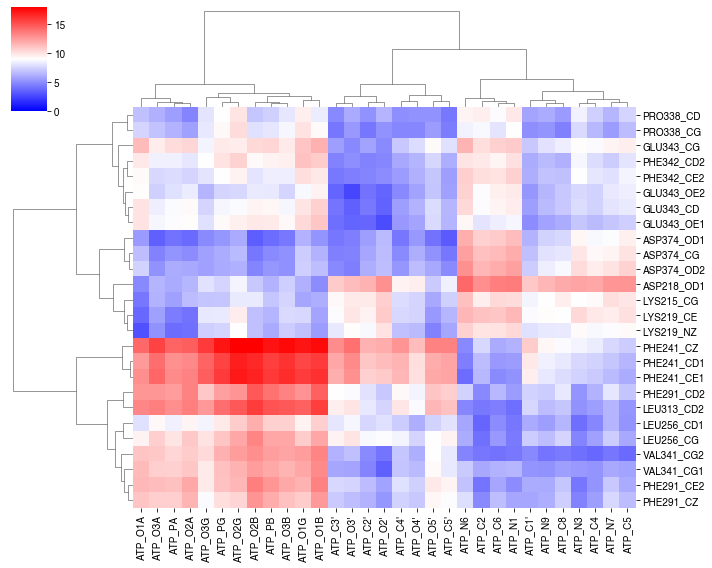

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6),dpi=300)
plt.rcParams["font.size"] = 10
plt.rcParams["font.family"] = "Helvetica"

sns.clustermap(df_dis,method="ward",metric='euclidean',cmap="bwr", vmin=0,vmax=18,
               annot_kws={"fontsize": 50},figsize=(10,8))
#plt.xticks()

plt.show()

<img src="1VJC_interaction.png" alt="Complex diagram" style="width:600px;height:400px;">